In [75]:
import db
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import scipy
def sigmoid(x,const,mu,sigma):
  return const/(1+np.exp((x-mu)/(sigma/2)))

def erf_fit(x,const,mu,sigma):
  return const/2+const/2*scipy.special.erf((mu-x)/sigma)

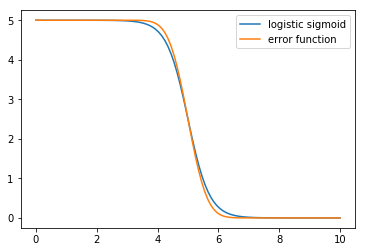

In [65]:
x = np.linspace(0,10,100)
y = sigmoid(x,5,5,0.7)

plt.plot(x,y,label="logistic sigmoid")

x = np.linspace(0,10,100)
y = erf_fit(x,5,5,0.7)

plt.plot(x,y,label="error function")
plt.legend()

In [3]:
name="4000"

In [4]:
board_info = db.find_board_by_name(name)

In [5]:
print(json.dumps(db.find_board_by_name("4000"),indent=2, sort_keys=True))

{
  "active": 1,
  "baseline_is_calibrated": -1,
  "board_chan": [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15
  ],
  "calib_file": "./boards/board_4000.json",
  "chamber": 8,
  "channels": [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15
  ],
  "fpc_a": 0,
  "fpc_b": 1,
  "fpc_c": 2,
  "fpc_d": 3,
  "hub_addr": "0xc035",
  "layer": 8,
  "name": "4000",
  "reverse_mapping": 0,
  "standby": 0,
  "t1_is_calibrated": 0,
  "t1_offsets": [
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0
  ],
  "tdc_addr": "0xf3cf",
  "tdc_connector": 1,
  "wires": [
    0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15
  ]
}


In [6]:

def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(np.dot(deviations**2,weights))
def list_rms(x):
  mean = sum(x)/len(x)
  deviations =  np.asarray(x) -  np.asarray(mean)
  return np.sqrt(sum(deviations**2) /len(x))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)




In [7]:
import pasttrec_ctrl as ptc
ptc.init_active_boards()  
import tdc_daq as td
import baseline_calib


baseline_mean = [15 for i in range(16)] 

print(" parallel baseline scan board, ", name)

#baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=True) 
baseline_calib.baseline_calib_by_noise(name, dummy_calib=True,individual=False)     
#read baseline scans from database:
dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
noise_scan_raw = dummy_calib["noise_scan_raw"]
noise_range    = dummy_calib["bl_range"]
# get baseline posiotion from mean of scan
for ch in range(0,8):
        if hist_rms(noise_range,noise_scan_raw[ch]) < 5.0:
           baseline_mean[ch] = MeanArrays(noise_range,noise_scan_raw[ch]) #noise_range[np.array(noise_scan_raw[i]).argmax()]
print(baseline_mean)        
# set found baselines:
baseline_calib.set_baselines_individual(name, baseline_mean ) 
#threshold scan with pulser ON!
print("switch on pulser, do threshold scan")
import rigol as rigol
rigol.output_on(2)  
#baseline_calib.set_baselines_individual(name, [15]*16 ) 
baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)    
rigol.output_off(2)




Welcome to JupyROOT 6.14/04
 parallel baseline scan board,  4000
[3.028826955074875, 3.663932714149351, 6.32511798636602, 10.976688838713615, 11.559504933051445, 5.984773998367932, 7.131004366812227, 10.380212213518362, 15, 15, 15, 15, 15, 15, 15, 15]
switch on pulser, do threshold scan
Rigol Technologies,DG4202,DG4E212801267,00.01.14


In [102]:
def calc_chisquare(meas, sigma, fit):
 test_statistic = 0
 diff = pow(meas-fit, 2.)
 for i in range(9,len(meas)):
  if sigma[i] > 0:
     test_statistic += diff[i] / pow(sigma[i],2.)
  else:
     test_statistic += diff[i]
 return test_statistic


chisquare/NDF = 238830.95 / 43 = 5554.2081


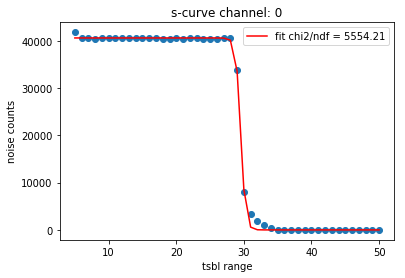

fit pram  0  =  40578.62753371883  +- =  119.83795204406212
fit pram  1  =  29.540343741299342  +- =  0.022990287617386113
fit pram  2  =  0.6912079038264758  +- =  0.03105795101221145
chisquare/NDF = 2.94 / 43 = 0.0684


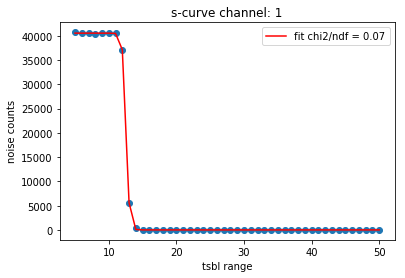

fit pram  0  =  40568.892057791956  +- =  25.77855156883217
fit pram  1  =  12.565570656985061  +- =  0.003060886190706068
fit pram  2  =  0.47343721838805375  +- =  0.0030089026590270768
chisquare/NDF = 120.87 / 43 = 2.8109


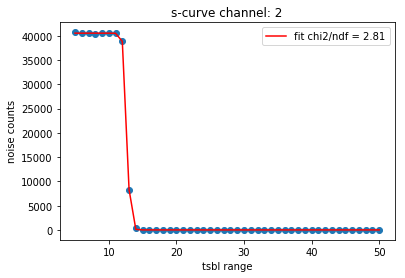

fit pram  0  =  40564.88739328559  +- =  20.77921107428793
fit pram  1  =  12.69795853623417  +- =  0.002780105428312936
fit pram  2  =  0.44482303828773023  +- =  0.003640165275242098
chisquare/NDF = 0.01 / 43 = 0.0003


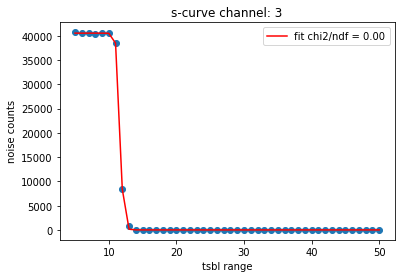

fit pram  0  =  40568.781171411385  +- =  39.985023392535524
fit pram  1  =  11.685327852601144  +- =  0.004670807057978194
fit pram  2  =  0.4673882627068334  +- =  0.00603432785379766
chisquare/NDF = 4.15 / 43 = 0.0965


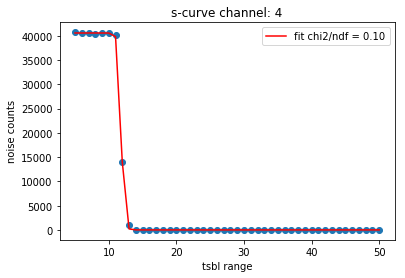

fit pram  0  =  40600.677902646756  +- =  60.168260055011224
fit pram  1  =  11.859950723407866  +- =  0.007177211922173819
fit pram  2  =  0.43232804323316204  +- =  0.019465276317873263
chisquare/NDF = 2139.48 / 43 = 49.7553


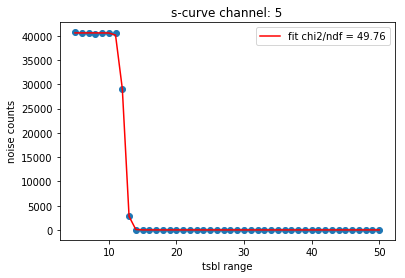

fit pram  0  =  40617.67568882726  +- =  28.196715727337107
fit pram  1  =  12.262856271270577  +- =  0.0028484174584880286
fit pram  2  =  0.5646202122403454  +- =  0.004684733346659364
chisquare/NDF = 9409.20 / 43 = 218.8186


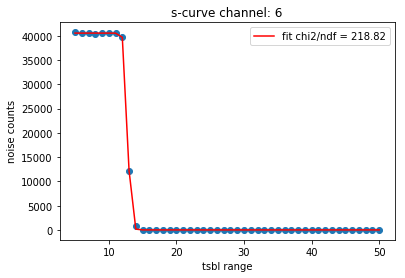

fit pram  0  =  40576.96539191585  +- =  39.46787604449475
fit pram  1  =  12.81948787702516  +- =  0.005551149762612757
fit pram  2  =  0.4275723543948044  +- =  0.01188077181279615
chisquare/NDF = 17030473.91 / 43 = 396057.5327


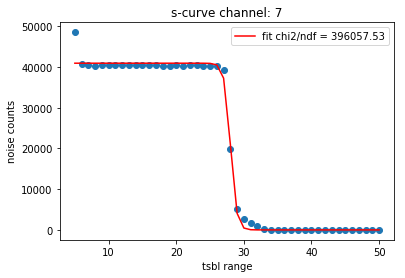

fit pram  0  =  40946.638228476804  +- =  284.74883027694494
fit pram  1  =  28.02442343157744  +- =  0.05247750335682522
fit pram  2  =  0.8842477006491166  +- =  0.10325043363104187


In [137]:
import scipy.optimize as optimization

#read threshold_scan from database:
dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
tsbl_range    = dummy_calib["tsbl_range"]   
#read baseline scans from database:
noise_scan_raw = dummy_calib["noise_scan_raw"]
noise_range    = dummy_calib["bl_range"]




for ch in range(0,8):
    
    
    

    x = np.array(tsbl_range)
    y = np.array(tsbl_scan_raw[ch])

    p0 = [np.amax(y),20,1]

    xmin = 5
    xmax = 50
    
    mask = (x >= xmin) & (x <= xmax)

    x = x[mask]
    y = y[mask]

    popt, pcov = curve_fit(sigmoid, x, y, p0=p0)
    #print(optimization.leastsq(sigmoid, p0, args=(x, y)))
    
    plt.scatter(x,y)
    #plt.plot(x,sigmoid(x,*p0),"g",label="p0")
    TS = calc_chisquare(y, errors , sigmoid(x,*popt))
    NDF = len(y) - len(p0)
    print("chisquare/NDF = {0:.2f} / {1:d} = {2:.4f}".format(TS, NDF, TS / NDF))
   

    plt.plot(x,sigmoid(x,*popt),"r-",label="fit chi2/ndf = {:.2f}".format(TS/NDF))
    plt.legend()
    plt.xlabel("tsbl range")
    plt.ylabel("noise counts")
    plt.title("s-curve channel: "+str(ch))
    plt.show()
    
    perr = np.sqrt(np.diag(pcov))
    
    for p in range(0,len(popt)):
        print("fit pram ",p," = ",popt[p], " +- = ",perr[p])
    errors =  np.sqrt(y)   
    #print(errors)
 
    

In [9]:
print(pcov)

[[ 9.44870848e+04 -3.24051748e+00  2.17483954e+00]
 [-3.24051748e+00  3.45720512e-03 -1.43268945e-04]
 [ 2.17483954e+00 -1.43268945e-04  2.18426782e-03]]


In [126]:
import hameg_PT_Frankfurt as htrb
#import hameg_trb as htrb

htrb.set_state(1,0)
htrb.set_state(1,1)

In [135]:
import csv
serial = "ooo334"
#table headers: only uncomment, when file is written for the first time.
channel_label_list = ['channel_0', 'channel_1', 'channel_2','channel_3','channel_4' ,'channel_5','channel_6', 'channel_7' ]   
l1 = [ "baseline_" + s for s in channel_label_list]
l2 = [ "s-curve_halfmax_" + s for s in channel_label_list]
l3 = [ "s-curve_sigma_" + s for s in channel_label_list]
l4 = [ "s-curve_chi2ndf_" + s for s in channel_label_list]
l5 = [ "Test_passed_" + s for s in channel_label_list]
table_row = ["serial"] +  l1 + l2   + l3  + l4  + l5

# table_row = [serial] +  baseline_mean +  py_noise_halfmax +  py_noise_sigma + py_noise_fit_chi2 +  passed_test
with open('PT_results_table.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(table_row)
    #